In [61]:
import pandas as pd
import numpy as np

data = pd.read_csv("student_data.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


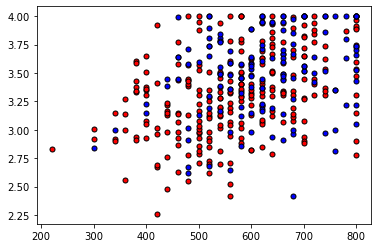

In [62]:
import matplotlib.pyplot as plt

def plot_points(data):
    x = np.array(data[["gre", "gpa"]])
    y = np.array(data["admit"])
    admitted = x[np.argwhere(y==1)]
    rejected = x[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, color = 'blue', edgecolor = 'k')
    plt.xlable = ('Test(GRE)')
    plt.ylable = ('Grades(GPA)')
    
plot_points(data)
plt.show()

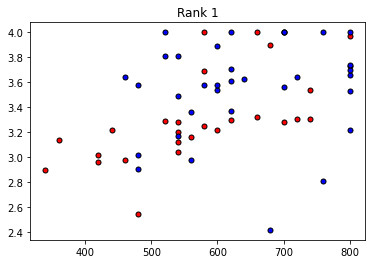

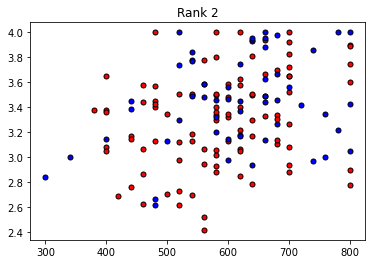

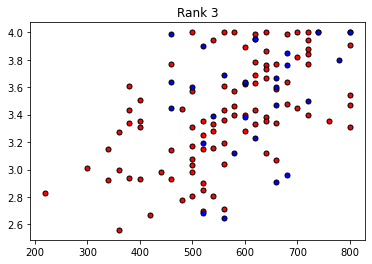

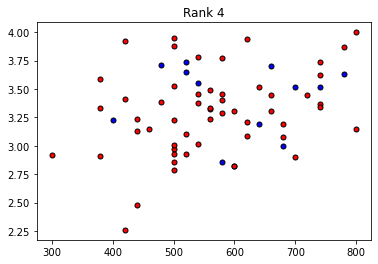

In [63]:
data_rank1 = data[data["rank"] == 1]
data_rank2 = data[data["rank"] == 2]
data_rank3 = data[data["rank"] == 3]
data_rank4 = data[data["rank"] == 4]

plot_points(data_rank1)
plt.title("Rank 1")
plt.show()

plot_points(data_rank2)
plt.title("Rank 2")
plt.show()

plot_points(data_rank3)
plt.title("Rank 3")
plt.show()

plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [84]:
h = pd.get_dummies(data['rank'], prefix = 'Rank')


one_hot_data = data.join(h)
one_hot_data.head()

,admit,gre,gpa,rank,Rank_1,Rank_2,Rank_3,Rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [85]:
new = one_hot_data.drop(['rank'], axis = 1)
new.head()

,admit,gre,gpa,Rank_1,Rank_2,Rank_3,Rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [86]:
new[:10]

,admit,gre,gpa,Rank_1,Rank_2,Rank_3,Rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [87]:
processed_data = new[:]
processed_data = processed_data - processed_data.min()
processed_data = processed_data / processed_data.max()

processed_data[:10]

,admit,gre,gpa,Rank_1,Rank_2,Rank_3,Rank_4
0,0.0,0.275862,0.775862,0.0,0.0,1.0,0.0
1,1.0,0.758621,0.810345,0.0,0.0,1.0,0.0
2,1.0,1.000000,1.000000,1.0,0.0,0.0,0.0
3,1.0,0.724138,0.534483,0.0,0.0,0.0,1.0
4,0.0,0.517241,0.385057,0.0,0.0,0.0,1.0
5,1.0,0.931034,0.425287,0.0,1.0,0.0,0.0
6,1.0,0.586207,0.413793,1.0,0.0,0.0,0.0
7,0.0,0.310345,0.471264,0.0,1.0,0.0,0.0
8,1.0,0.551724,0.649425,0.0,0.0,1.0,0.0
9,0.0,0.827586,0.954023,0.0,1.0,0.0,0.0


In [88]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit       gre       gpa  Rank_1  Rank_2  Rank_3  Rank_4
172    0.0  0.793103  0.701149     0.0     0.0     1.0     0.0
137    0.0  0.827586  1.000000     0.0     0.0     1.0     0.0
126    1.0  0.655172  0.735632     1.0     0.0     0.0     0.0
94     1.0  0.758621  0.678161     0.0     1.0     0.0     0.0
72     0.0  0.448276  0.649425     0.0     0.0     0.0     1.0
33     1.0  1.000000  1.000000     0.0     0.0     1.0     0.0
380    0.0  0.827586  0.798851     0.0     1.0     0.0     0.0
223    0.0  1.000000  0.695402     0.0     0.0     1.0     0.0
307    0.0  0.620690  0.718391     0.0     1.0     0.0     0.0
227    0.0  0.551724  0.436782     0.0     0.0     0.0     1.0
     admit       gre       gpa  Rank_1  Rank_2  Rank_3  Rank_4
20     0.0  0.482759  0.522989     0.0     0.0     1.0     0.0
21     1.0  0.758621  0.787356     0.0     1.0     0.0     0.0
48     0.0  0.379310  0.126437     0.0     0.0     0

In [89]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

          gre       gpa  Rank_1  Rank_2  Rank_3  Rank_4
172  0.793103  0.701149     0.0     0.0     1.0     0.0
137  0.827586  1.000000     0.0     0.0     1.0     0.0
126  0.655172  0.735632     1.0     0.0     0.0     0.0
94   0.758621  0.678161     0.0     1.0     0.0     0.0
72   0.448276  0.649425     0.0     0.0     0.0     1.0
33   1.000000  1.000000     0.0     0.0     1.0     0.0
380  0.827586  0.798851     0.0     1.0     0.0     0.0
223  1.000000  0.695402     0.0     0.0     1.0     0.0
307  0.620690  0.718391     0.0     1.0     0.0     0.0
227  0.551724  0.436782     0.0     0.0     0.0     1.0
172    0.0
137    0.0
126    1.0
94     1.0
72     0.0
33     1.0
380    0.0
223    0.0
307    0.0
227    0.0
Name: admit, dtype: float64


In [90]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [91]:
def error_term_formula(x, y, output):
    return (y - output) * x

In [92]:
epochs = 1000
learnrate = 0.0001

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error term
            error_term = error_term_formula(x, y, output)
            
            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term

        # Update the weights here. The learning rate times the 
        # change in weights
        # don't have to divide by n_records since it is compensated by the learning rate
        weights += learnrate * del_w #/ n_records  

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
            print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.7446667923611405
Finished training!
Epoch: 100
Train loss:  0.6457995380047139
Finished training!
Epoch: 200
Train loss:  0.6284982666513416
Finished training!
Epoch: 300
Train loss:  0.6227508821815101
Finished training!
Epoch: 400
Train loss:  0.6193028630932337
Finished training!
Epoch: 500
Train loss:  0.6167009825805477
Finished training!
Epoch: 600
Train loss:  0.614607418399617
Finished training!
Epoch: 700
Train loss:  0.612878981754633
Finished training!
Epoch: 800
Train loss:  0.611425186171921
Finished training!
Epoch: 900
Train loss:  0.6101809559613828
Finished training!


In [93]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.700
